In [1]:
import pandas as pd
import seaborn as sns
import numpy as np 
from gpxutils import parse_gpx 
import matplotlib.pyplot as plt
%matplotlib inline

# To convert UTC time zone
from dateutil import tz

# Analysis of Cycling Data

We are provided with four files containing recordings of cycling activities that include GPS location data as
well as some measurements related to cycling performace like heart rate and power.  The goal is to perform
some exploration and analysis of this data. 

The data represents four races.  Two are time trials where the rider rides alone on a set course.  Two are 
road races where the rider rides with a peleton.  All were held on the same course but the road races include
two laps where the time trials include just one. 

Questions to explore with the data:
* What is the overall distance travelled for each of the rides? What are the average speeds etc.  Provide a summary for each ride.
* Compare the range of speeds for each ride, are time trials faster than road races? 
* Compare the speeds achieved in the two time trials (three years apart).  As well as looking at the averages, can you see where in the ride one or the other is faster.  
* From the elevation_gain field you can see whether the rider is _climbing_ , _descending_ or on the _flat_.   Use this to calculate the average speeds in those three cases (climbing, flat or descending).  Note that _flat_ might not be zero elevation_gain but might allow for slight climbs and falls.  

For time varying data like this it is often useful to _smooth_ the data using eg. a [rolling mean](https://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.rolling_mean.html).  You might want to experiment with smoothing in some of your analysis (not required but may be of interest).

## Description of Fields

* _index_ is a datetime showing the time that the observation was made (I wasn't riding at night, this is converted to UTC)
* __latitude, longitude, elevation__ from the GPS, the position of the rider at each timepoint, elevation in m
* __temperature__ the current ambient temperature in degrees celcius
* __power__ the power being generated by the rider in Watts
* __cadence__ the rotational speed of the pedals in revolutions per minute
* __hr__ heart rate in beats per minute
* __elevation_gain__ the change in elevation in m between two observations
* __distance__ distance travelled between observations in km
* __speed__ speed measured in km/h

You are provided with code in [gpxutils.py](gpxutils.py) to read the GPX XML format files that are exported by cycling computers and applications.  The sample files were exported from [Strava](https://strava.com/) and represent four races by Steve Cassidy.


In [2]:
# Read the four data files
rr_2016 = parse_gpx('files/Calga_RR_2016.gpx')
tt_2016 = parse_gpx('files/Calga_TT_2016.gpx')
rr_2019 = parse_gpx('files/Calga_RR_2019.gpx')
tt_2019 = parse_gpx('files/Calga_TT_2019.gpx')

# Converting time to Sydney local time (UTC+10)
rr_2016.index = rr_2016.index.tz_convert('Australia/Sydney')
rr_2019.index = rr_2019.index.tz_convert('Australia/Sydney')
tt_2016.index = tt_2016.index.tz_convert('Australia/Sydney')
tt_2019.index = tt_2019.index.tz_convert('Australia/Sydney')

In [3]:
rr_2016.head()

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta
2016-05-14 14:02:41+10:00,-33.415561,151.222303,208.6,29.0,0.0,40.0,102.0,0.000000,0.0,0.000000,NaN
2016-05-14 14:02:42+10:00,-33.415534,151.222289,208.6,29.0,0.0,40.0,102.0,0.003271,0.0,11.777020,1.0
2016-05-14 14:02:46+10:00,-33.415398,151.222180,208.6,29.0,0.0,40.0,103.0,0.018194,0.0,16.375033,4.0
2016-05-14 14:02:49+10:00,-33.415264,151.222077,208.6,29.0,0.0,55.0,106.0,0.017703,0.0,21.243901,3.0
2016-05-14 14:02:51+10:00,-33.415160,151.222013,208.6,29.0,0.0,61.0,109.0,0.013001,0.0,23.401217,2.0


## Exploratory Data Analysis

I determined the most relevant columns are: `speed`, `temperature`, `cadence`, `hr`, `distance`, and `elevation_gain`.

In [4]:
cols = ['speed', 'temperature', 'cadence', 'hr', 'distance', 'elevation', 'elevation_gain']

Observing the boxplots of the key metrics we are going to explore, that is, `speed` and `distance`, we immediately observe clear outliers that require further investigation. This is done in a later part of the portfolio, [here](#outlier).

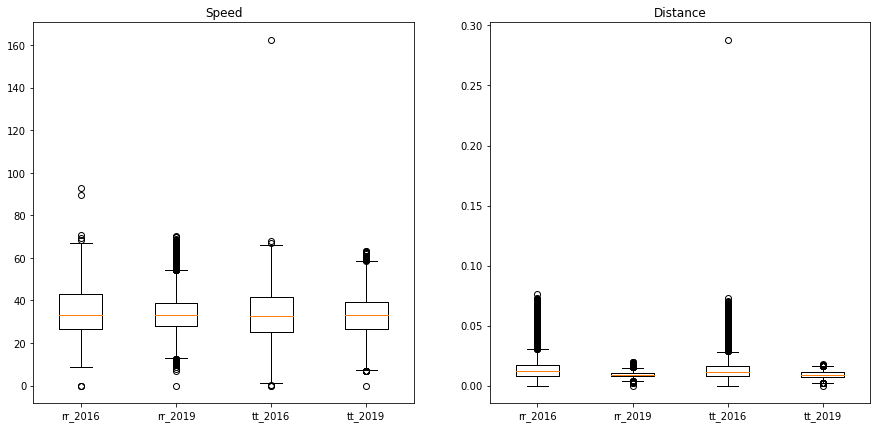

In [5]:
def toDict(col):
    my_dict = {'rr_2016':rr_2016[col], 'rr_2019':rr_2019[col],
              'tt_2016':tt_2016[col], 'tt_2019':tt_2019[col]}
    return (my_dict)

speeds = toDict('speed')
distances = toDict('distance')

fig, ax = plt.subplots(1, 2, figsize=(15,7))
ax[0].boxplot(speeds.values())
ax[0].set_xticklabels(speeds.keys())
ax[0].set_title('Speed')
ax[1].boxplot(distances.values())
ax[1].set_xticklabels(distances.keys())
ax[1].set_title('Distance')
plt.show()

## Summary

### Road Races

Looking at the 2016 and 2019 road races side-by-side, we notice that:

* The 2019 race was significantly colder
* There was an approximately 12.2% drop in heart rate from 2016 to 2019
* The 2019 race was further by about 2.75km

The reduction in heart rate in the 2019 race could be attributed to the significantly cooler temperatures.

In [6]:
print ('\033[1m' + '2016 Road Race Summary')
print('\033[0m' + 'Total distance: %skm' % round(sum(rr_2016['distance']),2))
display(rr_2016.describe()[cols])
print ('\033[1m' + '2019 Road Race Summary')
print('\033[0m' + 'Total distance: %skm' % round(sum(rr_2019['distance']),2))
display(rr_2019.describe()[cols])

2016 Road Race Summary
Total distance: 49.05km


,speed,temperature,cadence,hr,distance,elevation,elevation_gain
count,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000
mean,34.933085,25.280652,65.987952,158.394401,0.017381,232.404465,-0.003756
std,10.738677,1.348746,34.425881,11.304588,0.015695,29.725934,0.458872
min,0.000000,24.000000,0.000000,102.000000,0.000000,176.000000,-1.600000
25%,26.656312,24.000000,68.000000,151.000000,0.007894,209.450000,-0.400000
50%,33.307339,25.000000,79.000000,158.000000,0.011794,226.100000,0.000000
75%,42.871885,26.000000,87.000000,166.000000,0.016899,258.200000,0.400000
max,92.749036,30.000000,117.000000,205.000000,0.076283,295.800000,1.200000


2019 Road Race Summary
Total distance: 51.79km


,speed,temperature,cadence,hr,distance,elevation,elevation_gain
count,5503.000000,5503.000000,5503.000000,5503.000000,5503.000000,5503.000000,5503.000000
mean,33.879861,5.997819,70.004906,138.998546,0.009411,243.243576,0.000254
std,8.853503,0.806414,29.869938,16.184123,0.002459,30.197981,0.347322
min,0.000000,0.000000,0.000000,71.000000,0.000000,185.200000,-2.000000
25%,28.219962,5.000000,66.000000,129.000000,0.007839,219.600000,-0.200000
50%,33.041360,6.000000,81.000000,142.000000,0.009178,236.000000,0.000000
75%,38.640026,7.000000,89.000000,152.000000,0.010733,269.600000,0.200000
max,70.370469,7.000000,120.000000,170.000000,0.019547,310.400000,1.000000


### Time Trials
Looking at the 2016 and 2019 time trials side-by-side, we similarly notice that:

* The 2019 race was marginally colder
* There was an approximately 10.6% drop in heart rate from 2016 to 2019
* The two races were about the same distance, differing by only ~500m

The difference in temperature between the 2016 and 2019 time trials were not as significant as the difference between the road races. This leads me to believe that the reduction in heart rate could instead be attributed to differences in elevation. While the average elevation gain in both races are approximately `0m`, the max elevation gain in the 2016 race is four times that in the 2019 race.

In [7]:
print ('\033[1m' + '2016 Time Trial Summary')
print('\033[0m' + 'Total distance: %skm' % round(sum(tt_2016['distance']),2))
display(tt_2016.describe()[cols])
print ('\033[1m' + '2019 Time Trial Summary')
print('\033[0m' + 'Total distance: %skm' % round(sum(tt_2019['distance']),2))
display(tt_2019.describe()[cols])

2016 Time Trial Summary
Total distance: 24.8km


,speed,temperature,cadence,hr,distance,elevation,elevation_gain
count,1541.000000,1541.000000,1541.000000,1541.000000,1541.000000,1541.000000,1541.000000
mean,33.529963,10.953277,83.277093,170.939650,0.016095,139.068657,-0.002466
std,11.519681,0.657937,21.169978,23.392548,0.015897,30.301132,0.515343
min,0.000000,10.000000,0.000000,100.000000,0.000000,85.000000,-7.400000
25%,25.068271,11.000000,77.000000,157.000000,0.007622,116.200000,-0.400000
50%,32.840076,11.000000,86.000000,161.000000,0.010974,134.000000,0.000000
75%,41.470522,11.000000,96.000000,180.000000,0.015960,165.400000,0.400000
max,162.505764,13.000000,118.000000,251.000000,0.288175,202.600000,2.400000


2019 Time Trial Summary
Total distance: 24.38km


,speed,temperature,cadence,hr,distance,elevation,elevation_gain
count,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000
mean,33.057824,10.194350,89.979661,152.741243,0.009183,250.435104,0.000377
std,9.773522,0.833934,17.543883,8.217632,0.002715,29.434104,0.298628
min,0.000000,9.000000,0.000000,88.000000,0.000000,195.800000,-1.600000
25%,26.440757,10.000000,88.000000,150.000000,0.007345,229.200000,-0.200000
50%,33.220108,10.000000,94.000000,153.000000,0.009228,243.800000,0.000000
75%,39.286242,10.000000,98.000000,158.000000,0.010913,276.200000,0.200000
max,63.300734,13.000000,111.000000,166.000000,0.017584,312.200000,0.600000


## Speeds

The average speeds in each of the races (rounded to two decimal places) are shown below. To **avoid the calculation being influenced by outliers**, I calculated this from first principles, that is, by taking the distance travelled during the race and divided that by the time taken to complete the race.

In the context of these four races, we can conclude that the time trials were faster than the road races.

In [8]:
def avgSpeed(race):
    duration = (race.index[-1] - race.index[0]).total_seconds() / 60 / 60
    speed = sum(race['distance']) / duration
    return round(speed, 2)
avgSpeeds = {'RR 2016': avgSpeed(rr_2016), 'RR 2019': avgSpeed(rr_2019),
             'TT 2016': avgSpeed(tt_2016), 'TT 2019': avgSpeed(tt_2019)}
pd.DataFrame.from_dict(avgSpeeds, orient='index', columns=['Avg Speed (km/h)'])

,Avg Speed (km/h)
RR 2016,33.96
RR 2019,33.89
TT 2016,32.50
TT 2019,33.07


## A Closer Look at Time Trials <a id='outlier'>

To compare the 2016 and 2019 time trial speeds, I created a column representing the cumulative distance travelled, 
`cumDistance`.

In [9]:
def spd_vs_dist(data1, data2, title):
    
    data1['cumDistance'] = data1['distance'].cumsum(axis=0)
    data2['cumDistance'] = data2['distance'].cumsum(axis=0)
    
    fig, ax = plt.subplots(figsize=(10,5))
    ax.set_xlabel('Cumulative Distance (km)',fontsize = 11, labelpad=10)
    ax.set_ylabel('Speed (km/h)', fontsize = 11, labelpad=10)
    ax.plot(data1['cumDistance'], data1['speed'], label='2016')
    ax.plot(data2['cumDistance'], data2['speed'], label='2019')
    ax.legend(loc='upper left')
    ax.set_title('Speed vs Cumulative Distance in ' + title)
    plt.show()

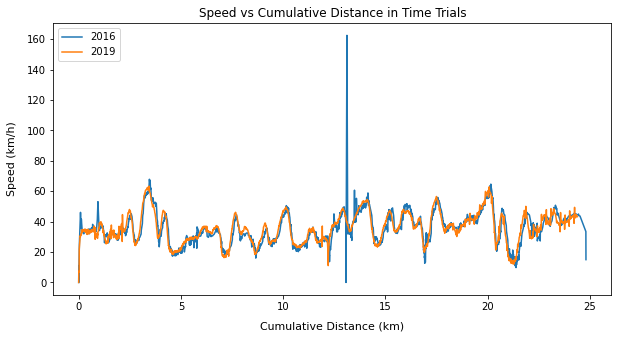

In [10]:
spd_vs_dist(tt_2016, tt_2019, 'Time Trials')

We can see that there was a significant spike in speed in the 2016 race. Looking at this outlier more closely:

In [11]:
tt_2016[tt_2016['speed']>100]

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta,cumDistance
2016-07-03 09:31:56+10:00,-33.323997,151.232286,186.8,10.0,0.0,85.0,178.0,0.04514,0.0,162.505764,1.0,13.11588


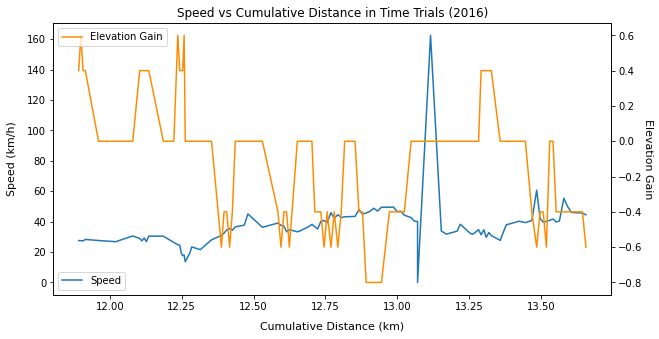

In [12]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel('Cumulative Distance (km)',fontsize = 11, labelpad=10)
ax.set_ylabel('Speed (km/h)', fontsize = 11, labelpad=10)
ax.plot(tt_2016['cumDistance'][800:900], tt_2016['speed'][800:900], label='Speed')
ax2 = ax.twinx()
ax2.plot(tt_2016['cumDistance'][800:900], tt_2016['elevation_gain'][800:900], label='Elevation Gain', color='darkorange')
ax2.set_ylabel('Elevation Gain', fontsize=11, labelpad=10, rotation=270)
ax.legend(loc='lower left')
ax2.legend(loc='upper left')
plt.title('Speed vs Cumulative Distance in Time Trials (2016)')
plt.show()

There is **no clear and obvious reason** to explain this surge in speed.

* The distance of the section was not significantly shorter than the average.
* The elevation gain was measured to be zero, that is, flat.
* Looking at the `speed` and `elevation_gain` in the sections before and after this moment in the graph below, this section was not an unordinary downhill.

Given the reading in the previous section was `0`, this suggests an instrument error.

Smoothing this value out using `rolling()`:

In [13]:
tt_2016['speed'] = tt_2016['speed'].rolling(window=5, min_periods=1).mean()
tt_2019['speed'] = tt_2019['speed'].rolling(window=5, min_periods=1).mean()

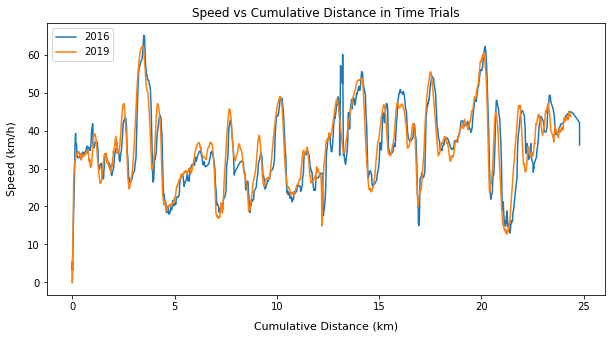

In [14]:
spd_vs_dist(tt_2016, tt_2019, 'Time Trials')

## Speed by Elevation Gain

We can clearly see that a negative elevation constitutes a higher average speed. This **makes sense** and is ultimately **unsurprising**.

In [15]:
def groupBy(race):
    summary = race[['speed']].groupby(pd.cut(race['elevation_gain'], np.arange(-2, 4))).mean()
    summary.columns = ['avgSpeed']
    return summary

### Road Races

,avgSpeed_2016,avgSpeed_2019
elevation_gain,,
"(-2, -1]",60.570985,57.292782
"(-1, 0]",39.632062,36.942783
"(0, 1]",26.392798,28.815089
"(1, 2]",21.553503,NaN
"(2, 3]",NaN,NaN


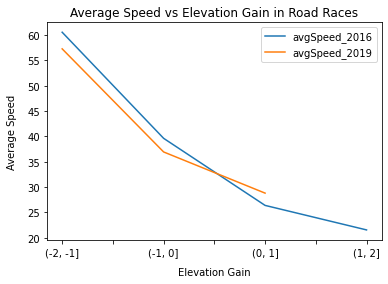

In [16]:
rr = groupBy(rr_2016).join(groupBy(rr_2019), lsuffix='_2016', rsuffix='_2019')
display(rr)
rr.plot()
plt.xlabel('Elevation Gain', labelpad=10)
plt.ylabel('Average Speed', labelpad=10)
plt.title('Average Speed vs Elevation Gain in Road Races')
plt.show()

### Time Trials

,avgSpeed_2016,avgSpeed_2019
elevation_gain,,
"(-2, -1]",55.433293,57.378072
"(-1, 0]",38.097855,37.272531
"(0, 1]",25.043453,26.468141
"(1, 2]",28.432693,NaN
"(2, 3]",27.275007,NaN


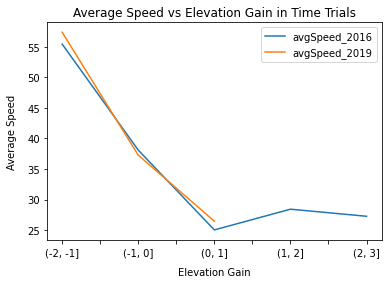

In [17]:
tt = groupBy(tt_2016).join(groupBy(tt_2019), lsuffix='_2016', rsuffix='_2019')
display(tt)
tt.plot()
plt.xlabel('Elevation Gain', labelpad=10)
plt.ylabel('Average Speed', labelpad=10)
plt.title('Average Speed vs Elevation Gain in Time Trials')
plt.show()

## Challenge: Gear Usage

A modern race bike has up to 22 different gears with two chainrings on the front (attached to the pedals) and 10 or 11 at the back (attached to the wheel).   The ratio of the number of teeth on the front and rear cogs determines the distance travelled with one revolution of the pedals (often called __development__, measured in metres).  Low development is good for climbing hills while high development is for going fast downhill or in the final sprint. 

We have a measure of the number of rotations of the pedals per minute (__cadence__) and a measure of __speed__.  Using these two variables we should be able to derive a measure of __development__ which would effectivly tell us which gear the rider was using at the time.   Development will normally range between __2m__ and __10m__.  Due to errors in GPS and cadence measurements you will see many points outside this range and you should just discard them as outliers. 

Write code to calculate __development__ in _meters_ for each row in a ride.  Plot the result in a _histogram_ and compare the plots for the four rides.   Comment on what you observe in the histograms.





In [18]:
# Calculates development
def development(race):
    race['development'] = (race['speed']/60*1000) / race['cadence']
    return race['development'][(race['development'] > 2) & (race['development'] < 10)]

# Adds the 'development' column to the dataframes
rr_dev_2016 = development(rr_2016)
rr_dev_2019 = development(rr_2019)
tt_dev_2016 = development(tt_2016)
tt_dev_2019 = development(tt_2019)

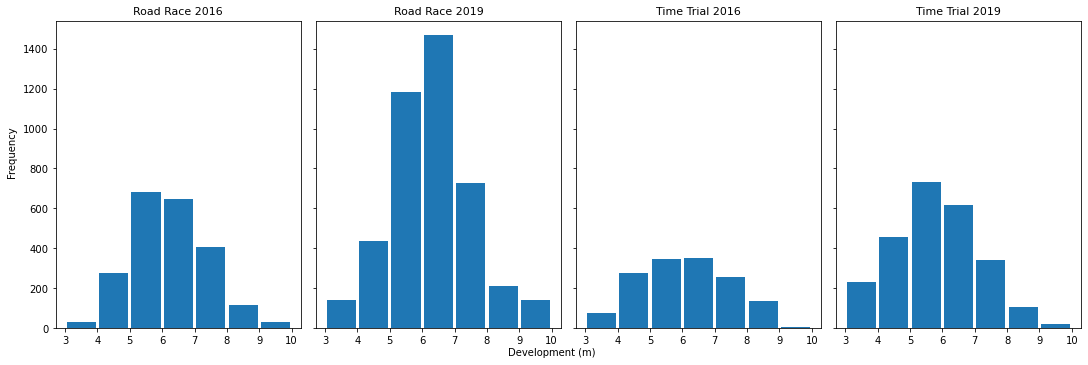

In [19]:
fig, ax = plt.subplots(1, 4, sharey=True, tight_layout=True, figsize=(15,5))
ax[0].set_title('Road Race 2016', fontsize=11)
ax[0].hist(rr_dev_2016, rwidth=0.9, bins=np.arange(3,11))
ax[1].set_title('Road Race 2019', fontsize=11)
ax[1].hist(rr_dev_2019, rwidth=0.9, bins=np.arange(3,11))
ax[2].set_title('Time Trial 2016', fontsize=11)
ax[2].hist(tt_dev_2016, rwidth=0.9, bins=np.arange(3,11))
ax[3].set_title('Time Trial 2019', fontsize=11)
ax[3].hist(tt_dev_2019, rwidth=0.9, bins=np.arange(3,11))
fig.text(0.5, 0, 'Development (m)', ha='center')
fig.text(0, 0.5, 'Frequency', ha='center', rotation=90)
plt.show()

From the above histograms, we visually conclude that development follows a normal distribution. This is quite an interesting result. We can also notice that the most frequent development is generally `5m` or `6m`.

# Resources

* [Convert UTC time to local time](https://www.w3resource.com/pandas/series/series-dt-tz_convert.php)
* [How to print bold text](https://stackoverflow.com/questions/8924173/how-do-i-print-bold-text-in-python)
* [Convert dictionary to dataframe](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.from_dict.html)
* [Change figure size](https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib)
* [Cumulative sum of column](https://www.geeksforgeeks.org/cumulative-sum-of-a-column-in-pandas-python/)
* [Two y-axis on the same graph](https://cmdlinetips.com/2019/10/how-to-make-a-plot-with-two-different-y-axis-in-python-with-matplotlib/)
* [Group by range of values](https://stackoverflow.com/questions/21441259/pandas-groupby-range-of-values)
* [Common xlabel, ylabel for graph](https://stackoverflow.com/questions/16150819/common-xlabel-ylabel-for-matplotlib-subplots)